In [35]:
import pandas as pd 
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
#Load DataSet

df =pd.read_csv('./Datasets/users.csv')

#Display first 5 row
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   12            19000          0
1  15810944    Male   11            20000          0
2  15668575  Female    1            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   10            76000          0


In [37]:
x =df.iloc[:,:-1]
y =df.iloc[:,-1]

In [38]:
x=pd.get_dummies(x,drop_first=True)

print(x.head())

    User ID  Age  EstimatedSalary  Gender_Male
0  15624510   12            19000         True
1  15810944   11            20000         True
2  15668575    1            43000        False
3  15603246   27            57000        False
4  15804002   10            76000         True


In [39]:
x_train,x_test,y_train,y_test =train_test_split(
    x,y,test_size =0.3 ,random_state=42
    
)

In [40]:
model =DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

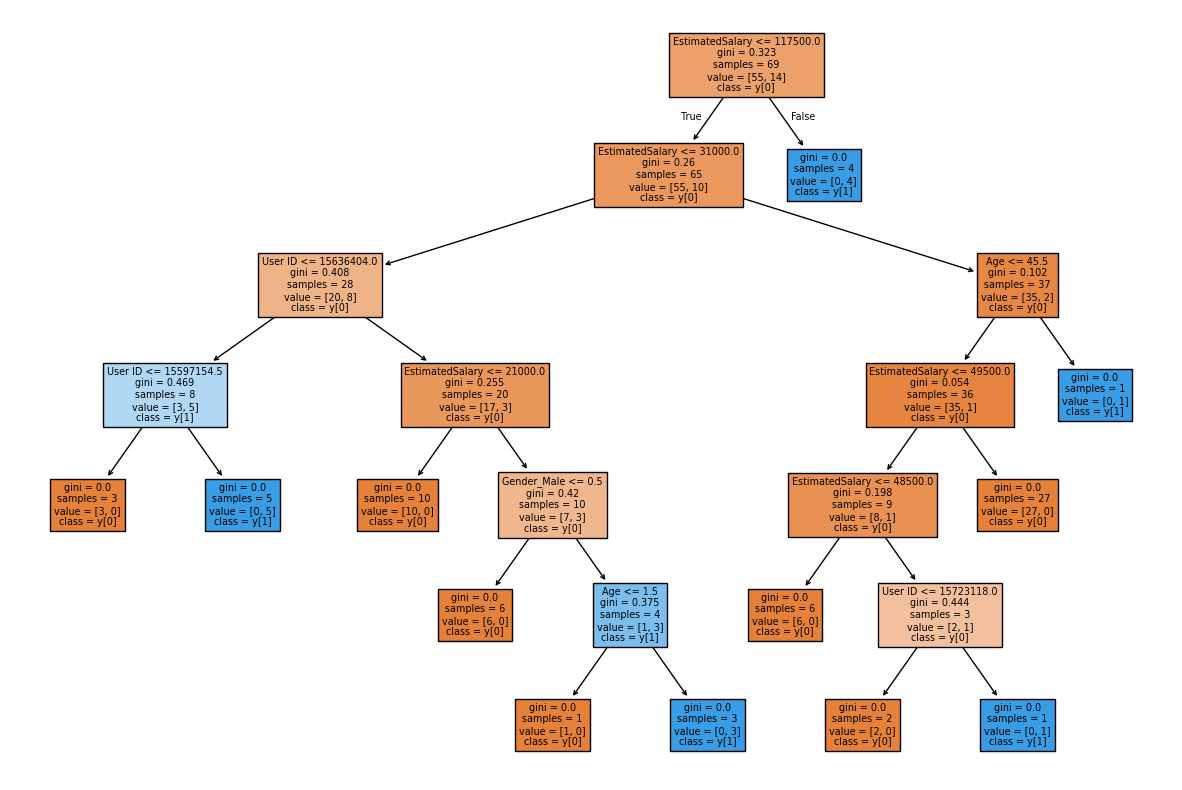

In [41]:
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=x.columns, class_names=True, filled=True)
plt.show()

In [42]:
train_pred = model.predict(x_train)
train_accuracy =accuracy_score(y_train,train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [43]:
test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.9


###Exercise 2

In [44]:
df = pd.read_csv('./Datasets/iris.csv')
print(df.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [45]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [46]:
le = LabelEncoder()
y = le.fit_transform(y)

print("Encoded classes:", le.classes_)

Encoded classes: ['setosa' 'versicolor' 'virginica']


In [48]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [50]:
model = GaussianNB()
model.fit(x_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [52]:
y_pred = model.predict(x_test)

In [53]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [54]:
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

